In [80]:
#Extended Dynamic Mode Decomposition (Ext DMD)
# Step 1: Import required libraries
import numpy as np	
import matplotlib.pyplot as plt

Shape of u_data: (500, 64, 64)
Shape of v_data: (500, 64, 64)


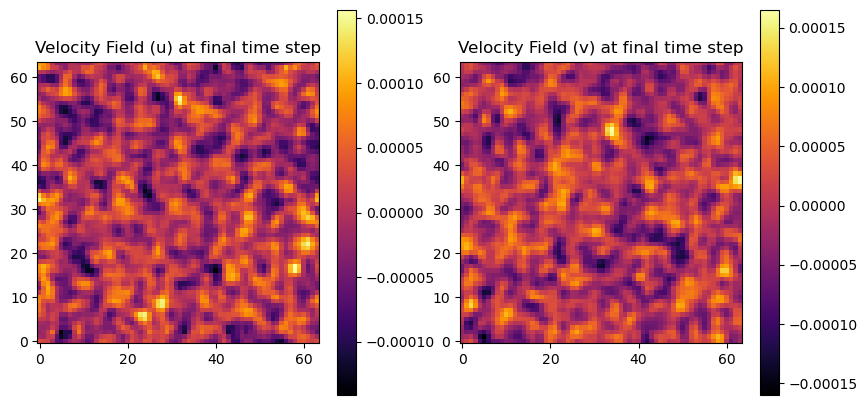

In [82]:
# Step 2: Load KolSol-generated data (velocity fields)
u_data = np.load('u_data.npy')  # X-velocity component
v_data = np.load('v_data.npy')  # Y-velocity component

# Print the shape of the loaded data
print(f"Shape of u_data: {u_data.shape}")
print(f"Shape of v_data: {v_data.shape}")

# Visualize the velocity field at the final time step
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Velocity Field (u) at final time step")
plt.imshow(u_data[-1], origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Velocity Field (v) at final time step")
plt.imshow(v_data[-1], origin='lower', cmap='inferno')
plt.colorbar()

plt.show()

In [84]:
from pydmd import DMD

# Applying DMD to the reshaped data
dmd_u = DMD(svd_rank=10)  # Adjust the SVD rank if needed
dmd_v = DMD(svd_rank=10)

dmd_u.fit(u_reshaped)
dmd_v.fit(v_reshaped)

# Retrieve the DMD modes and eigenvalues
modes_u = dmd_u.modes
modes_v = dmd_v.modes
eigenvalues_u = dmd_u.eigs
eigenvalues_v = dmd_v.eigs

In [85]:
pip install pydmd

Note: you may need to restart the kernel to use updated packages.


In [88]:
pip install --upgrade pydmd

In [90]:
from pydmd import DMD

# Applying DMD to the reshaped data
dmd_u = DMD(svd_rank=10)  # Adjust the SVD rank if needed
dmd_v = DMD(svd_rank=10)

dmd_u.fit(u_reshaped)
dmd_v.fit(v_reshaped)

# Retrieve the DMD modes and eigenvalues
modes_u = dmd_u.modes
modes_v = dmd_v.modes
eigenvalues_u = dmd_u.eigs
eigenvalues_v = dmd_v.eigs

In [91]:
print("Shape of u_data:", u_data.shape)
print("Shape of u_reshaped:", u_reshaped.shape)
print("Shape of modes_u:", modes_u.shape)

Shape of u_data: (500, 64, 64)
Shape of u_reshaped: (4096, 500)
Shape of modes_u: (4096, 10)


E:\Anaconda\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 3.979506964377655e+16. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
E:\Anaconda\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 1.7858280616301078e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


Shape of modes_u before truncation: (4096, 499)


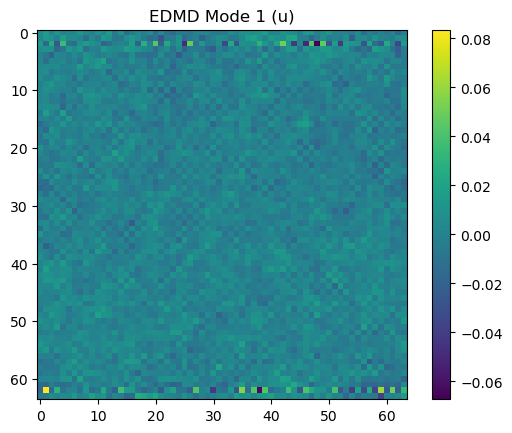

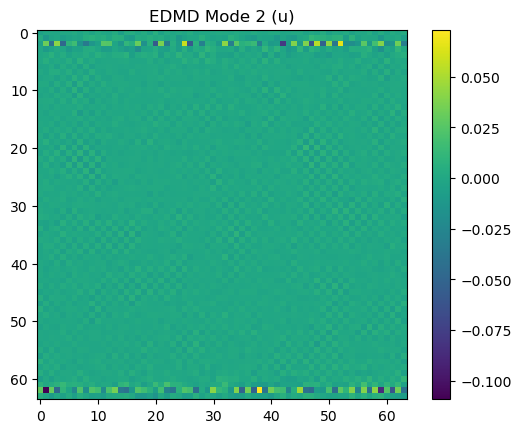

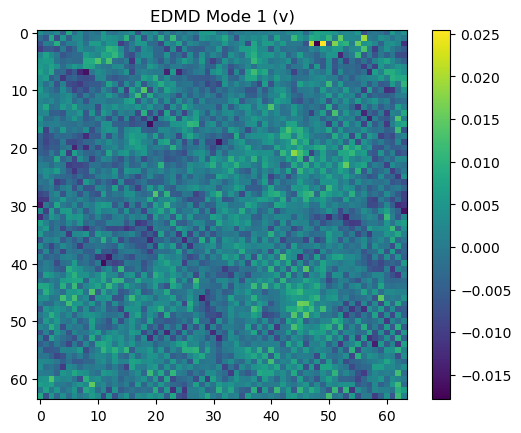

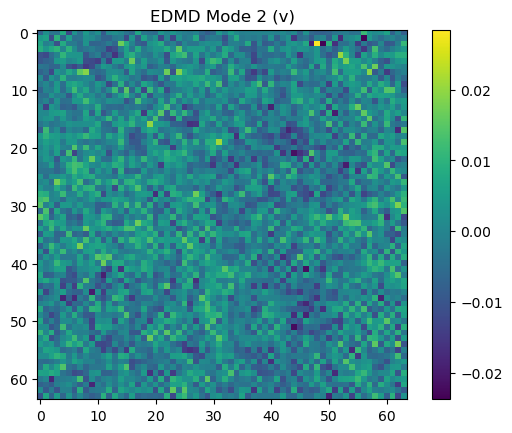

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from pydmd import EDMD

# Custom polynomial dictionary function for Extended DMD
def polynomial_basis(X, degree=2):
    """Generate a polynomial basis for the input data X."""
    basis = [X]
    for d in range(2, degree + 1):
        basis.append(X ** d)
    return np.vstack(basis)

# Reshape the u_data and v_data for EDMD
u_reshaped = u_data.reshape(u_data.shape[0], -1).T
v_reshaped = v_data.reshape(v_data.shape[0], -1).T

# Apply a custom polynomial basis to the data
degree = 2
u_poly = polynomial_basis(u_reshaped, degree)
v_poly = polynomial_basis(v_reshaped, degree)

# Apply EDMD to the polynomial data
edmd_u = EDMD()
edmd_u.fit(u_poly)

edmd_v = EDMD()
edmd_v.fit(v_poly)

# Retrieve the EDMD modes and eigenvalues for u_data
# Only keep the components corresponding to the original data (4096 points)
modes_u = edmd_u.modes[:u_reshaped.shape[0], :]
eigenvalues_u = edmd_u.eigs

# Retrieve the EDMD modes and eigenvalues for v_data
modes_v = edmd_v.modes[:v_reshaped.shape[0], :]
eigenvalues_v = edmd_v.eigs

# Truncate further, only keeping modes corresponding to original grid size
print("Shape of modes_u before truncation:", modes_u.shape)  # Should be (4096, 10)

# Visualize the first EDMD mode for u_data
plt.imshow(modes_u[:, 0].real.reshape(64, 64), cmap='viridis')  # Reshape to 64x64
plt.colorbar()
plt.title('EDMD Mode 1 (u)')
plt.show()

# Visualize the second EDMD mode for u_data
plt.imshow(modes_u[:, 1].real.reshape(64, 64), cmap='viridis')  # Reshape to 64x64
plt.colorbar()
plt.title('EDMD Mode 2 (u)')
plt.show()

# Visualize the first EDMD mode for v_data
plt.imshow(modes_v[:, 0].real.reshape(64, 64), cmap='viridis')  # Reshape to 64x64
plt.colorbar()
plt.title('EDMD Mode 1 (v)')
plt.show()

# Visualize the second EDMD mode for v_data
plt.imshow(modes_v[:, 1].real.reshape(64, 64), cmap='viridis')  # Reshape to 64x64
plt.colorbar()
plt.title('EDMD Mode 2 (v)')
plt.show()
